In [1]:
%load_ext autoreload
%autoreload 2
!RUST_BACKTRACE=1 cargo run -- ../models/bouncing_ball.mo -t ../templates/sympy.jinja > bouncing_ball.py

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.08s
     Running `/home/jgoppert/git/rumoca_parol/target/debug/rumoca ../models/bouncing_ball.mo -t ../templates/sympy.jinja`


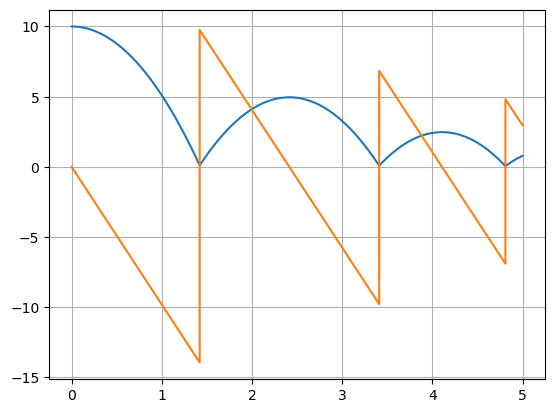

In [2]:
import bouncing_ball
import numpy as np
import matplotlib.pyplot as plt

model = bouncing_ball.Model()
model.solve()

f1 = lambda t, x: x[0]
f1.direction = 0
f1.terminal = True

model.events = [
    f1
]

model.event_callback = {
    0: lambda t, x: [x[0], -0.7*x[1]]
}

model.x0['h'] = 10
res = model.simulate(t0=0, tf=5, dt=0.01)
plt.plot(res['t'], res['x'].T)
plt.grid()

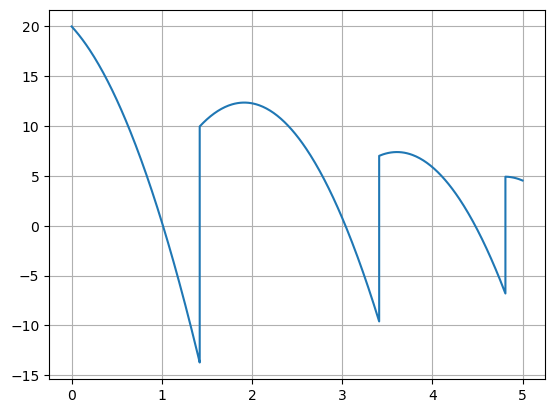

In [3]:
plt.plot(res['t'], res['y'].T)
plt.grid()


In [4]:
%%timeit
res = model.simulate(t0=0, tf=5, dt=0.01)

4.54 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
